In [1]:
# pip install --upgrade librosa==0.10.2 soundfile 

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
filename_angry='dataset/angry/0006_000352.wav'
filename_sad='dataset/suprised/0006_001409.wav'

In [2]:
import IPython.display as ipd
import librosa
import librosa.display

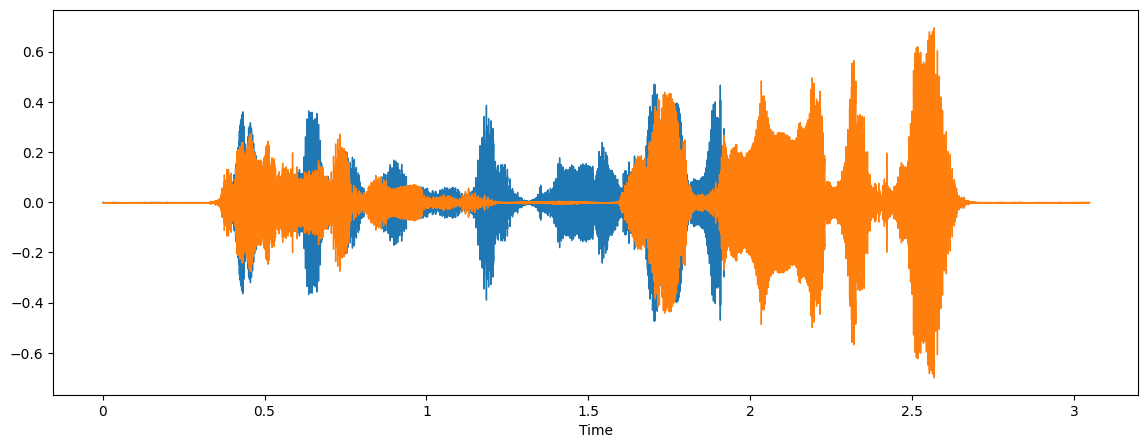

In [5]:
plt.figure(figsize=(14, 5))
librosa_audio_data_angry, librosa_sample_rate_angry = librosa.load(filename_angry)
librosa_audio_data_sad, librosa_sample_rate_sad = librosa.load(filename_sad)
# ipd.Audio(filename_angry)
librosa.display.waveshow(librosa_audio_data_angry, sr=librosa_sample_rate_angry)
librosa.display.waveshow(librosa_audio_data_sad, sr=librosa_sample_rate_sad)

In [8]:
print(librosa_sample_rate_angry)
print(librosa_sample_rate_sad)
print(librosa_audio_data_angry)
print(librosa_audio_data_sad)

22050
22050
[0.00103488 0.00116008 0.0010021  ... 0.00018281 0.0001336  0.        ]
[0.00034873 0.00044293 0.00040132 ... 0.00151973 0.00131127 0.        ]


In [9]:
## Extracting Fearures
mfccs = librosa.feature.mfcc(y=librosa_audio_data_angry, sr=librosa_sample_rate_angry, n_mfcc=40)
print(mfccs.shape)

(40, 102)


In [47]:
mfccs

array([[-577.3062   , -582.35     , -584.887    , ..., -585.93115  ,
        -585.61127  , -585.71857  ],
       [  15.40506  ,    8.477295 ,    4.836426 , ...,    3.4497895,
           3.9030256,    3.7511184],
       [  14.690564 ,    8.3598385,    4.608218 , ...,    3.4422698,
           3.897927 ,    3.7455807],
       ...,
       [   1.1126528,    2.4728055,    2.1636012, ...,    1.9706233,
           2.046893 ,    1.7664261],
       [   1.1451536,    2.4661524,    1.9763784, ...,    1.9273438,
           1.9687946,    1.6847485],
       [   1.1948438,    2.4599771,    1.8863082, ...,    1.8826882,
           1.8908103,    1.6033945]], dtype=float32)

In [48]:
# pip install soxr

In [3]:
import numpy as np

def feature_extractor(file_name):
    audio, sample_rate = librosa.load(file_name)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

    return mfccs_scaled_features

In [11]:
pathname_happy = 'dataset/happy/0006_000702.wav'
feature_extractor(pathname_happy)

array([-3.9651596e+02,  6.9475677e+01, -3.0008469e+01,  2.0295496e+01,
       -2.8535772e+01,  4.9779654e+00, -2.0995745e+01,  2.0169442e+00,
       -2.7222065e+01, -5.3809242e+00, -9.3590927e+00, -1.5106743e+01,
        1.5915842e+00, -1.2023591e+01,  8.2686901e+00, -8.9945555e+00,
       -9.1078920e+00, -6.3115349e+00,  3.6367815e+00,  6.8889540e-01,
        8.6621962e+00,  2.0305328e+00, -4.0034466e+00,  1.2861202e+01,
        2.3969285e+00,  4.6079121e+00,  8.4763181e-01,  6.1838216e-01,
       -4.6537418e+00, -1.3814549e-01,  6.0637110e-01,  1.8626637e+00,
        4.8543406e+00,  7.8459054e-01,  4.7969685e+00,  2.4101975e+00,
        4.6194205e+00,  2.4009938e+00,  9.2385778e+00,  3.9618449e+00],
      dtype=float32)

In [23]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import librosa

# Assuming the dataset is structured as "dataset/<emotion_folder>/<audio_files>"
dataset_dir = 'dataset/'  # Root directory where the folders are located (e.g., 'angry', 'happy')

# Initialize an empty list to store extracted features and their corresponding labels (emotions)
extracted_features = []

# Traverse through each folder (which corresponds to the emotion category)
for emotion_folder in os.listdir(dataset_dir):
    emotion_path = os.path.join(dataset_dir, emotion_folder)

    # Ensure that it's a directory
    if os.path.isdir(emotion_path):
        print(f"Processing {emotion_folder}...")
        
        # Iterate over each audio file in the folder
        for audio_file in tqdm(os.listdir(emotion_path)):
            file_path = os.path.join(emotion_path, audio_file)
            
            # Check if the file is an actual audio file (e.g., .wav, .mp3)
            if file_path.endswith('.wav') or file_path.endswith('.mp3'):
                try:
                    # Extract MFCC features using the feature_extractor function
                    mfcc_features = feature_extractor(file_path)
                    
                    # Append the features and the emotion label (which is the folder name) to the list
                    extracted_features.append([mfcc_features, emotion_folder])
                except Exception as e:
                    print(f"Error processing {file_path}: {e}")

# Convert the list to a Pandas DataFrame for easier processing later
df = pd.DataFrame(extracted_features, columns=['features', 'label'])

# Optionally, save the DataFrame to a CSV for future use
df.to_csv('dataset_extracted_features.csv', index=False)

print("Feature extraction completed!")


Processing angry...


  0%|          | 0/6650 [00:00<?, ?it/s]

100%|██████████| 6650/6650 [01:44<00:00, 63.73it/s]


Processing happy...


100%|██████████| 6651/6651 [01:48<00:00, 61.16it/s]


Processing neutral...


100%|██████████| 6650/6650 [01:51<00:00, 59.88it/s]


Processing sad...


100%|██████████| 6651/6651 [01:56<00:00, 57.16it/s]


Processing suprised...


100%|██████████| 6650/6650 [01:51<00:00, 59.59it/s]


Feature extraction completed!


In [24]:
import pandas as pd
extracted_features_df = pd.DataFrame(extracted_features, columns=['features', 'class'])
print(extracted_features_df.shape)
extracted_features_df.head()

(33250, 2)


,features,class
0,"[-395.0378, 77.66719, -32.549118, 40.873173, -...",angry
1,"[-399.44467, 73.71435, -20.708067, 24.862354, ...",angry
2,"[-427.8988, 87.04448, -34.921104, 18.26445, -2...",angry
3,"[-408.11905, 86.441666, -28.10285, 23.559793, ...",angry
4,"[-401.56836, 71.468445, -30.581055, 29.04639, ...",angry


In [25]:
## split the dataset into independent and dependent dataset
X = np.array(extracted_features_df['features'].tolist())
Y = np.array(extracted_features_df['class'].tolist())

Y

array(['angry', 'angry', 'angry', ..., 'suprised', 'suprised', 'suprised'],
      dtype='<U8')

In [26]:
X.shape

(33250, 40)

In [27]:
## label encoding
# y=np.array(pd.get_dummies(Y))
# y.shape
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import joblib

labelencoder = LabelEncoder()
y=to_categorical(labelencoder.fit_transform(Y))
y

# Save the fitted LabelEncoder to a file
joblib.dump(labelencoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [28]:
## train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [29]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(26600, 40)
(26600, 5)
(6650, 40)
(6650, 5)


In [11]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [30]:
num_labels = Y_train.shape[1]
num_labels

5

In [144]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define model
model = Sequential()

# First layer
model.add(Dense(500, input_shape=(40,)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.4))

# Second layer
model.add(Dense(1000))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.5))

# Third layer
model.add(Dense(500))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.3))

# Final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

# Compile the model with an appropriate optimizer
# optimizer = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Early stopping callback to monitor validation loss and stop if no improvement
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)



In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 150)               6150      
                                                                 
 batch_normalization_3 (Bat  (None, 150)               600       
 chNormalization)                                                
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 150)               0         
                                                                 
 dropout_3 (Dropout)         (None, 150)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               30200     
                                                                 
 batch_normalization_4 (Bat  (None, 200)               800       
 chNormalization)                                     

In [152]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 40
num_batch_size = 52

checkpointer = ModelCheckpoint(filepath='save_models/audio_class.hdf5', verbose=1, save_best_only=True)

start = datetime.now()

model.fit(X_train, Y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, Y_test), callbacks=[early_stop])
duration = datetime.now() - start
print("Training time ", duration)


Epoch 1/40
512/512 [==============================] - 5s 10ms/step - loss: 0.4894 - accuracy: 0.8205 - val_loss: 0.4259 - val_accuracy: 0.8414
Epoch 2/40
512/512 [==============================] - 5s 10ms/step - loss: 0.3814 - accuracy: 0.8593 - val_loss: 0.3359 - val_accuracy: 0.8798
Epoch 3/40
512/512 [==============================] - 6s 12ms/step - loss: 0.3520 - accuracy: 0.8718 - val_loss: 0.4011 - val_accuracy: 0.8474
Epoch 4/40
512/512 [==============================] - 6s 11ms/step - loss: 0.3413 - accuracy: 0.8752 - val_loss: 0.2820 - val_accuracy: 0.8928
Epoch 5/40
512/512 [==============================] - 7s 13ms/step - loss: 0.3328 - accuracy: 0.8809 - val_loss: 0.3581 - val_accuracy: 0.8665
Epoch 6/40
512/512 [==============================] - 6s 12ms/step - loss: 0.3170 - accuracy: 0.8851 - val_loss: 0.3012 - val_accuracy: 0.8923
Epoch 7/40
512/512 [==============================] - 6s 12ms/step - loss: 0.3077 - accuracy: 0.8867 - val_loss: 0.4199 - val_accuracy: 0.8493

In [153]:
test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(test_accuracy[1])

# model.save('tuned_model.h5')

0.9366917014122009


In [38]:
test_accuracy

[0.3351686894893646, 0.8881202936172485]

In [154]:
import numpy as np
import librosa
from keras.models import load_model
import joblib

# Load the trained model
# model = load_model('tuned_model.h5')

# Load the fitted LabelEncoder
labelencoder = joblib.load('label_encoder.pkl')

# Load and extract MFCC features
test_pathname = 'Angry/0003_000374.wav'
audio, sample_rate = librosa.load(test_pathname)
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

# Reshape the features for prediction
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)

# Predict using the model
predicted_probabilities = model.predict(mfccs_scaled_features)
print(f"Predicted Probabilities: {predicted_probabilities}")

# Get the class index with the highest probability
predicted_label_index = np.argmax(predicted_probabilities, axis=1)
print(f"Predicted Class Index: {predicted_label_index}")

# Convert the predicted label index back to the actual class label
prediction_class = labelencoder.inverse_transform(predicted_label_index.tolist())
print(f"Predicted Emotion: {prediction_class[0]}")


1/1 [==============================] - 0s 21ms/step
Predicted Probabilities: [[9.3668764e-03 9.0573914e-02 3.1208716e-10 6.6807081e-11 9.0005916e-01]]
Predicted Class Index: [4]
Predicted Emotion: suprised


In [155]:
## test dataset - predictions

from sklearn.metrics import classification_report, confusion_matrix

predicted_probabilities = model.predict(X_test)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Generate classification report
print("Classification Report:")
print(classification_report(np.argmax(Y_test, axis=1), predicted_labels))

# Generate confusion matrix
confusion_mtx = confusion_matrix(np.argmax(Y_test, axis=1), predicted_labels)
print("Confusion Matrix:")
print(confusion_mtx)


208/208 [==============================] - 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1305
           1       0.93      0.88      0.90      1314
           2       0.91      0.98      0.94      1316
           3       0.96      0.96      0.96      1344
           4       0.93      0.95      0.94      1371

    accuracy                           0.94      6650
   macro avg       0.94      0.94      0.94      6650
weighted avg       0.94      0.94      0.94      6650

Confusion Matrix:
[[1192   42   28    9   34]
 [  31 1160   48   10   65]
 [   5    4 1287   19    1]
 [   3    2   43 1294    2]
 [  14   43    8   10 1296]]


In [156]:
import numpy as np
import librosa
import sounddevice as sd
import time
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder

# Load your pre-trained model
# saved_model = load_model('small_tuned_model.h5')

# Define parameters
duration = 2  # Duration in seconds for each prediction
sample_rate = 22050  # Sample rate for librosa
num_labels = 5  # Adjust according to your model

# Function to extract features from audio data
def feature_extractor(audio_data, sr):
    mfccs_features = librosa.feature.mfcc(y=audio_data, sr=sr, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    return mfccs_scaled_features

# Function to predict emotion from audio data
def predict_emotion():
    # Start recording audio
    print("Recording...")
    audio_data = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float64')
    sd.wait()  # Wait until recording is finished
    print("Recording finished.")

    # Extract features
    prediction_feature = feature_extractor(audio_data.flatten(), sample_rate)
    prediction_feature = prediction_feature.reshape(1, -1)  # Reshape for the model

    # Make a prediction using the trained model
    predicted_probabilities = model.predict(prediction_feature)
    print(f"Predicted Probabilities: {predicted_probabilities}")

    # Get the class index with the highest probability
    predicted_label_index = np.argmax(predicted_probabilities, axis=1)
    print(f"Predicted Class Index: {predicted_label_index}")

    # Convert the predicted label index back to the actual class label
    prediction_class = labelencoder.inverse_transform(predicted_label_index)
    print(f"Predicted Emotion: {prediction_class[0]}")

# Run predictions in a loop
while True:
    predict_emotion()
    time.sleep(1)  # Pause for a moment if needed, or set to 5 seconds to avoid overlap


Recording...
Recording finished.
1/1 [==============================] - 0s 24ms/step
Predicted Probabilities: [[1.0000000e+00 4.2462572e-10 1.4855797e-16 1.7948845e-10 1.3890812e-10]]
Predicted Class Index: [0]
Predicted Emotion: angry
Recording...
Recording finished.
1/1 [==============================] - 0s 25ms/step
Predicted Probabilities: [[1.0000000e+00 1.1189087e-16 7.5262455e-19 5.3687244e-10 1.3110492e-16]]
Predicted Class Index: [0]
Predicted Emotion: angry
Recording...
Recording finished.
1/1 [==============================] - 0s 21ms/step
Predicted Probabilities: [[5.7288504e-01 9.1727998e-07 8.8601536e-07 4.2711309e-01 9.3033456e-09]]
Predicted Class Index: [0]
Predicted Emotion: angry
Recording...
Recording finished.
1/1 [==============================] - 0s 20ms/step
Predicted Probabilities: [[3.2435535e-03 4.4135744e-04 5.1911263e-04 9.9579465e-01 1.3416015e-06]]
Predicted Class Index: [3]
Predicted Emotion: sad
Recording...
Recording finished.
1/1 [====================

KeyboardInterrupt: 